<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-файла-с-данными-и-получение-общей-информации" data-toc-modified-id="Загрузка-файла-с-данными-и-получение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка файла с данными и получение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Формирование-портрета-пользователя-для-каждого-региона" data-toc-modified-id="Формирование-портрета-пользователя-для-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Формирование портрета пользователя для каждого региона</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-первой-гипотезы" data-toc-modified-id="Проверка-первой-гипотезы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка первой гипотезы</a></span></li><li><span><a href="#Проверка-второй-гипотезы" data-toc-modified-id="Проверка-второй-гипотезы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка второй гипотезы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Сборный проект по исследованию магазина "Стримчик"

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b> Структура датафрейма:</b> 

1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Загрузка файла с данными и получение общей информации

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Загрузка файла с локального ПК и платформы Яндекс Практикум
try:
    data = pd.read_csv('D:\Учеба\Аналитик данных\Проект 4\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Отобразим первые 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#  Выведем основную описательную статистику по датафрейму
data.describe().applymap("{:.2f}".format)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


';'

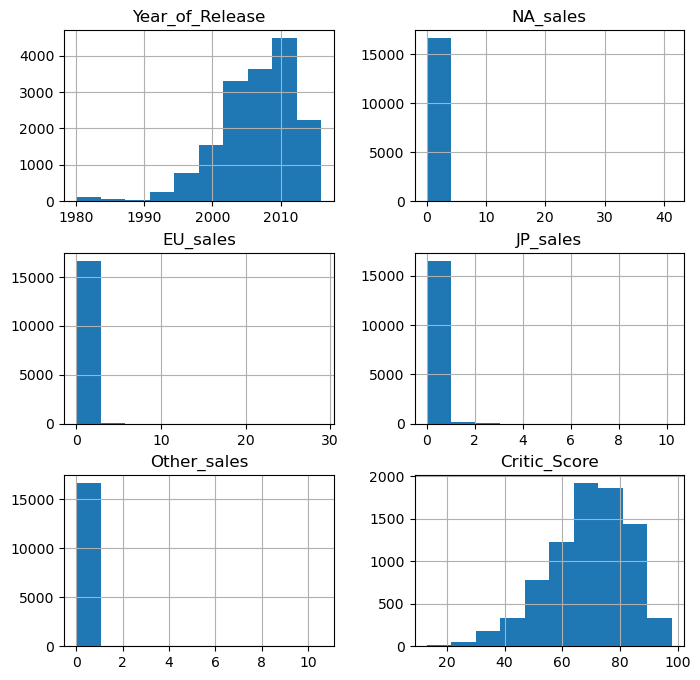

In [6]:
#  Строим гистограммы для числовых столбцов датасета
data.hist(figsize=(8, 8))
';'

In [7]:
# Выведем матрицу корреляции, чтобы определить наиболее зависимые величины
data.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [8]:
# Выведем количество пропусков в датафрейме
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:**
    
Датафрейм представлен 11 столбцами и 16715 строками. В части столбцов есть проблема с неккоректным типом:
    
**Year_of_Release** - возможно перевести в целочисленный тип в случае удаления (заполнения пропусков) с целью сокращения "веса" датафрейма
    
**User_Score** - возможно изменение строкового типа в числовые значения, однако в данном столбце есть аббревиатура "tbd", что в переводе обозначает "будет определено". Поэтому для изменения типа в данном столбце необходим предварительный анализ строк с данной аббревиатурой.
    
В данных представлена информация с 1980 по 2016 год. В продажах по регионам есть аномально большие значения проданных копий - необходимо проверить корректность заполнения позиций. Больше всего игр выпущено в 2010 году, а средняя оценка критиков составлят около 70 баллов.
    
По матрице корреляции обнаружена довольно сильная взаимосвязь между продажами в Северной Америке и Европе, а также другими странами и Европой.
    
В датафрейме довольно большое количество пропусков (порядка 45%) в столбцах с оценкой критиков, пользователей и рейтингом.

### Предобработка данных

In [9]:
# Переименуем столбцы в соответствии со стилистическими нормами кода
data.columns = data.columns.str.lower()

In [10]:
# Заполним пропуски в столбце "year_of_release" начальной датой релиза на любой другой платформе
for game in data['name'].unique():
    data.loc[(data['year_of_release'].isna()) & (data['name'] == game), 'year_of_release'] = \
    data.loc[data['name'] == game, 'year_of_release'].min()

<div style="border:solid Green 2px; padding: 20px">
    
Как ранее было обозначено, в столбце "user_score" есть часть строк с аббревиатурой "tbd". Большой вопрос, почему такие значения появились в рейтинге - так как есть строки с играми, которые были выпущены в 2000-х годах, и которые явно имеют оценки для анализа. Возможно эти аббревиатуры появилсь на моменте сбора информации - он проводился с открытых источников, поэтому можно предположить о том, что такие строки планировали заполнить позднее.
    
При необходимости данные ячейки можно заполнить следующим алгоритмом: так как это оценка пользователей, то в случае выпуска игры на нескольких игровых платформах можно взять среднюю оценку этой игры. В случае же релиза игры только на одной платформе, можно заполнить данные через уравнение регрессии в зависимости от оценки критиков - это возможно сделать, так как между данными оценками есть зависимость, коэффициент корреляции составлят порядка 0.6.
    
Так как сам факт аббревиатуры tbd не несет смысла, то данные строки можно заменить на пропуски.

In [11]:
# Заменим аббревиатуру "tbd" на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

<div style="border:solid Green 2px; padding: 20px">
    
**year_of_release** - оставшиеся пропуски в данном столбце заполнить не представляется возможным, так как игра была или выпущена на одной платформе, или на всех платформах не указана дата релиза. Вероятнее всего пропуски появились из-за ошибок и неккоректных алгоритмов обработки информации. В связи с тем, что в дальнейшем будет проводится анализ с учетом данного столбца, для удобства отображения на графиках целочисленных значений, следует удалить строки с пропусками.
    
**name и genre** - 2 пропуска в единых строках. Следует удалить данные строки, так как нет понимания о какой игре идет речь, и насколько верифицирована данная информация.
    
**critic_score, user_score** - отсутствие значений в столбце с оценками критиков может быть обусловлено масштабностью игры. Если она небольшая, локальная, то критики не делают на нее оценки и обзоры. Такую же аналогию можно провести и с оценками игроков - для небольших игр сложно найти отзывы и обратную связь игроков. Заполнить данные строки не представляется возможным, так как нет явно зависимых данных.
    
**rating** - такую же гипотезу можно предположить и по выставлению рейтинга. Для малых игр ассоциация ESRB не выставляет рейтинг. Заполнить данные пропуски невозможно.

In [12]:
# Удаление строк с пропусками в столбцах name, genre и year_of_release
data = data.dropna(subset = ['name', 'year_of_release']).reset_index(drop=True)

In [13]:
# Изменим тип данных в столбцах user_score и year_of_release
data = data.astype({'user_score':'float64', 'year_of_release':'int32'})

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:**
    
В столбцах **critic_score, user_score и rating** осталось наибольшее количество пропусков, которые не представляется возможным заполнить из-за отсутствия взаимосвязи с другими данными.
    
В остальных столбцах полностью устранены пропуски и выполнена корректировка типа данных.

In [14]:
# Определим суммарные продажи игры по всем регионам
data.insert(loc = 4, column = 'total_sales', value = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1))

### Исследовательский анализ данных

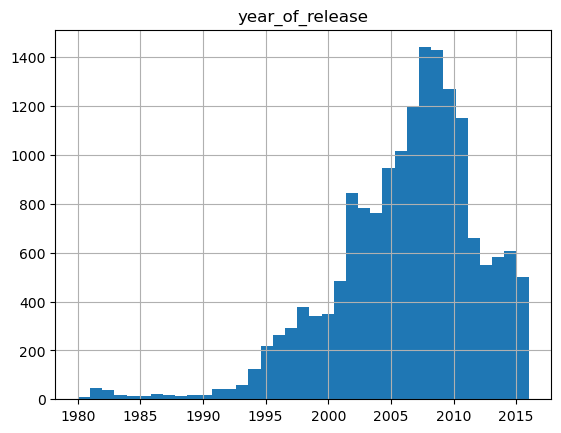

In [15]:
# Построим гистограмму распределения релиза игр по годам
data['year_of_release'].hist(bins=37)
plt.title('year_of_release')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
На гистограмме виден пик в 2008-2009 годах, когда релиз игр достигал порядка 1400 штук в год. После наблюдается период снижения динамики и выход на "плато" в 2012-2016 годах. Небольшой "провал" по 2016 году можно объяснить неполнотой данных за этот год, в связи с чем можно предположить о среднестатистическом годе.
    
Таким образом для прогнозных данных необходимо брать, так сказать, последний статистический опыт - период с 2012 по 2016 года. Если принять данные за больший период, то полученные прогнозы, вероятнее всего, будут завышенными, ведь по графику на текущий момент нет тенденции к быстрому росту количества выпущенных игр в год.

In [16]:
# Создадим сводную таблицу с 10 платформами с наибольшим числом продаж
top_10 = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)\
.head(10)

# Выведем на экран
top_10

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


In [17]:
# Создадим сводную таблицу динамики продаж игр на платформах из списка "Топ - 10"
top_platforms = (
    data[data['platform'].isin(top_10.index)].
    pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
)

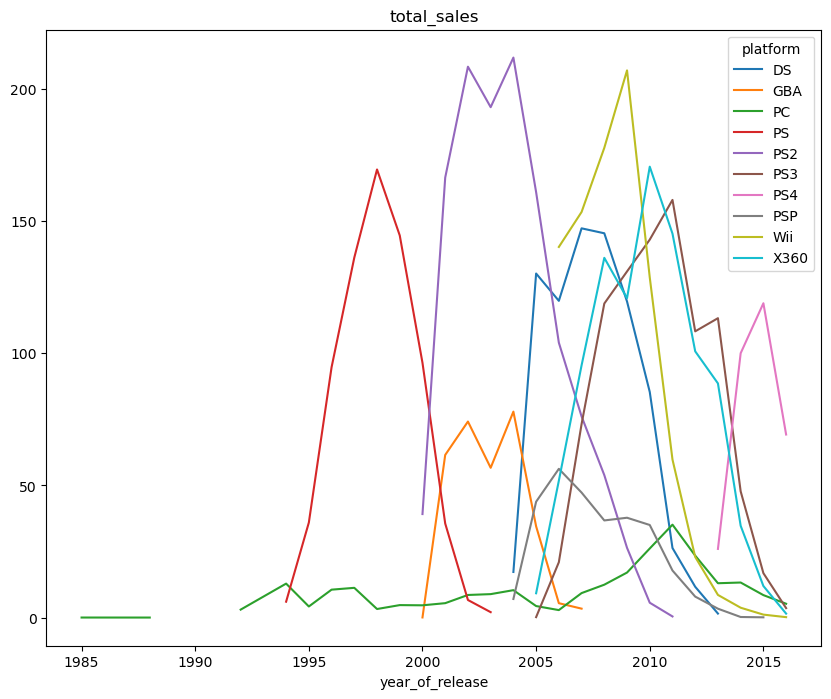

In [18]:
# Построим график с динамикой продаж игр на платформах "Топ-10"
top_platforms.plot(kind = 'line', figsize = (10, 8))
plt.title('total_sales')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
По данному графику явно видна динамика продаж лидирующих платформ. В среднем "срок жизни" платформы составляет порядка 10 лет, а новые модели из одной серии появляются в среднем через 6 лет. Также можно выделить 2 интересные особенности с данного графика: персональный компьютер, несмотря на кажущуюся распространенность, совершенно не конкурирует с игровыми платформами, однако он имеет самый большой цикл жизни. И второй особенностью является количество платформ к 2016 году - мы видим падение на всех линиях, а основной платформой для игр является PS4.

In [19]:
# Выполним срез по датафрейму с актуальным периодом для прогноза
data_act = data[data['year_of_release'] >= 2015]

<div style="border:solid Green 2px; padding: 20px">
    
Несмотря на то, что с 2012 года игровая индустрия вышла на плато по релизу игр, данный бизнес является динамичным и претерпевает большие изменения в короткие сроки: так мы видим большое количество новых платформ, которые регулярно выходят на рынок. А учитывая то что 2015-2016 год является среднестатистически последним годом для актуальности некоторых платформ, имеет смысл ограничить период для прогнозирования двумя годами - принять данные за весь 2015 год и имеющиеся данные за 2016 год.

In [20]:
# Отобразим сводную таблицу с динамикой продаж по платформам за выбранный период
data_act.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [21]:
# Рассмотрим суммарные продажи по годам
data_act.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2015,267.98
2016,129.94


In [22]:
# Суммарные продажи по платформам
data_act.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


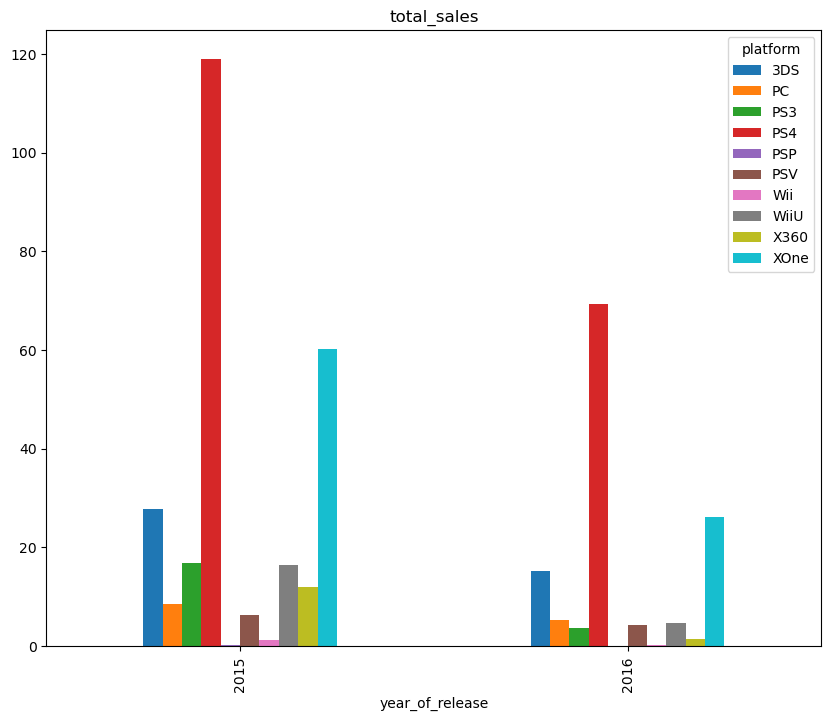

In [23]:
# Построим гистограмму для наглядного представления данных
data_act.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', figsize = (10, 8))
plt.title('total_sales')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
За выбранный период на рынке всего существует 10 платформ, и все они показывают темпы снижения продаж. Явным лидером является PS4 - очень быстрый взлет до пиковых значений и высокие показатели на 2016 год. Таже высокие показатели имеет непосредственный конкурент по рынку - XBOX One. Все же из таблицы с общими продажами за год видно общее снижение на рынке - несмотря на неполные данные за 2016 год, можно предположить о нисходящей тенденции. В целом видно, что на рынке есть 3 подавляющих лидера - самые популярные платформы: 3DS, XBOX One и PS4.

<div style="border:solid Green 2px; padding: 20px">

Для анализа платформ выберем ранее определнных лидеров и дополнительно возьмем персональный компьютер, как платформу с наибольшим жизненным циклом.

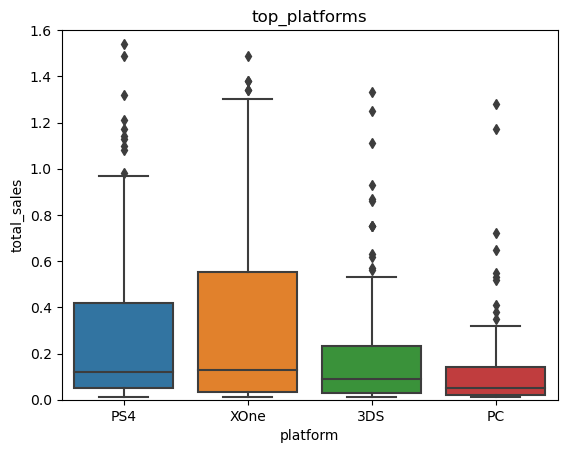

In [24]:
# Отобразим график "ящих с усами" по выбранным платформам
sns.boxplot(x = 'platform', 
            y = 'total_sales', 
            data = data_act[data_act['platform'].isin(['PS4', '3DS', 'XOne', 'PC'])])
plt.title('top_platforms')
plt.ylim(0, 1.6)
plt.show()

<div style="border:solid Green 2px; padding: 20px">

По полученному графику boxplot видно, что пользователи предпочитают в основном играть на XBOX ONE - здесь самая большая медиана, 3 квартиль и межквартильный размах. То есть удельно игры продаются лучше именно на данной платформе. 
    
Касаемо предыдущего лидера, PS4, его статистика несколько ниже, однако в данном случае наблюдается довольно большая плотность аномально больших значений, которые в итоге и дают наибольшую сумму по продажам. Также можно предположить и про эксклюзивные игры для платформ - в данном случае они могут сильно влиять на аномально высокие продажи для PS4.
    
Также стоит отметить рекордное количество продаж одной игры - оно зафиксировано на платформе PS4 и составляет порядка 15 млн проданных копий.
    
Однако в целом медианные продажи на всех платформах приближены к первому квартилю - то есть основная масса выпущенных игр имеет общие продажи на выборочной платформе не выше 200 тысяч копий.
    
А наиболее распространенная платформа - персональный компьютер имеет наихудшую статистику.

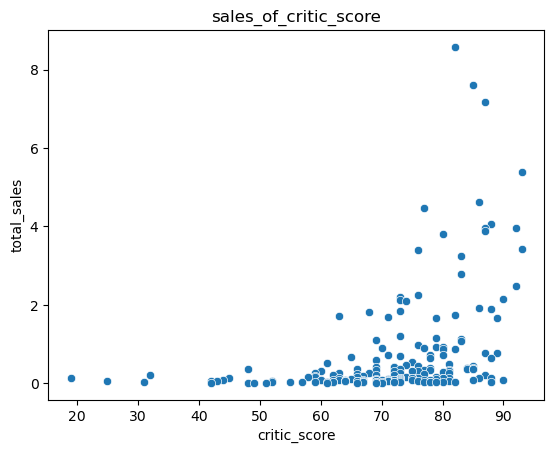

Коэффициент корреляции продаж от critic_score составляет: 0.3928485555130601


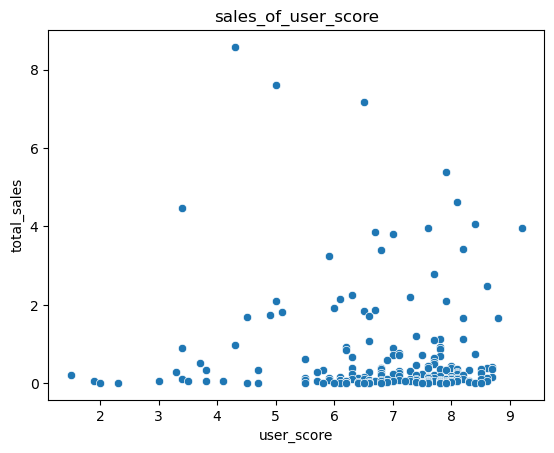

Коэффициент корреляции продаж от user_score составляет: -0.05973845712638215


In [25]:
# Реализуем цикл для построения диаграммы рассеяния и расчета коэффициента корреляции для одной платформы
for column in ['critic_score', 'user_score']:
    sns.scatterplot(x = column, y = 'total_sales', data = data_act[data_act['platform'] == 'PS4'])
    plt.title('sales_of_' + column)
    plt.show()
    
    print(f'Коэффициент корреляции продаж от {column} составляет:', 
          data_act.loc[data_act['platform'] == 'PS4', 'total_sales'].corr(data_act[column]))

<div style="border:solid Green 2px; padding: 20px">

По полученным диаграммам и коэффициентам корреляции можно сделать следующие выводы:
    
Между оценкой критиков и продажами на платформе PS4 есть слабая линейная связь - коэффициент корреляции составляет 0.4 д.ед. По диаграмме видно, что основная масса оценок лежит в диапазоне от 60 до 90, также наблюдается невыраженная тенденция к увеличению продаж в зонах с высокими оценками.
    
Между оценкой игроков и продажами как визуально, так и по коэффициенту корреляции линейная связь отсутствует. Большая плотность оценок лежит в диапазоне от 5.5 до 8.8 баллов. Однако в сравнении с оценками критиков, в данном случае разброс значений больше, и наблюдаются высокие продажи игр с низкими оценками.

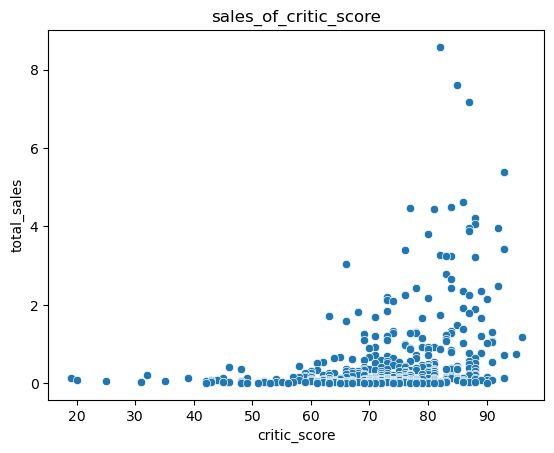

Коэффициент корреляции продаж от critic_score составляет: 0.3255266225393335


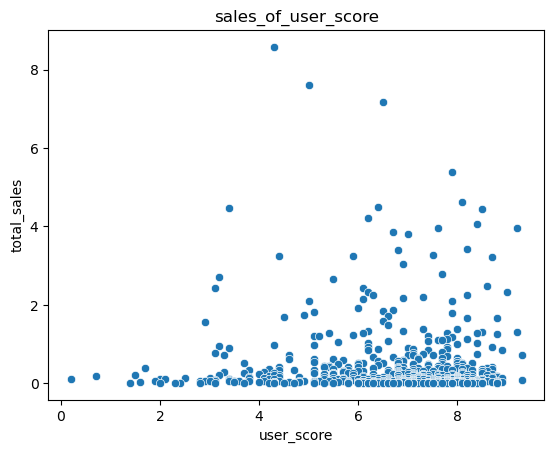

Коэффициент корреляции продаж от user_score составляет: -0.001964293112246338


In [26]:
# Реализуем цикл для построения диаграммы рассеяния и расчета коэффициента корреляции для всех платформ
for column in ['critic_score', 'user_score']:
    sns.scatterplot(x = column, y = 'total_sales', data = data_act)
    plt.title('sales_of_' + column)
    plt.show()
    
    print(f'Коэффициент корреляции продаж от {column} составляет:', 
          data_act['total_sales'].corr(data_act[column]))

<div style="border:solid Green 2px; padding: 20px">

По полученным результатам можно утверждать, что полученные ранее выводы можно экстраполировать на все данные - увеличилось количество и плотность данных, однако принципальный вид диаграмм не изменился. Также коэффициенты корреляции не претерпели глобальных изменений.

In [27]:
# Отобразим сводную таблицу по количеству игр,суммарным и медианным продажам в разных жанрах 
data_act.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'sum', 'median'])\
.sort_values(by = ('median', 'total_sales'), ascending = False)

,count,sum,median
,total_sales,total_sales,total_sales
genre,,,
Shooter,81,105.73,0.380
Sports,107,64.33,0.120
Role-Playing,132,55.82,0.115
Platform,28,9.28,0.100
Simulation,33,7.55,0.100
Fighting,37,12.37,0.090
Action,431,102.13,0.060
Misc,71,14.17,0.060


<div style="border:solid Green 2px; padding: 20px">

Самым высоко продаваемым жанром является "шутер", данный жанр также характеризуется наибольшим показателем медианных продаж - шутеры продаются в 3 раза лучше, чем ближайшие кокнуренты "спорт" и "RPG". А вот в количестве данный жанр не лидирует: всего 81 игра против 431 в жанре "экшн". Но ведь лучше качество, а не количество :)
    
Самый непопулярный жанр это пазл.
    
В целом можно выделить 4 жанра - это лидер по абсолютным и медианным продажам "шутер", его конкуренты "спорт" и "RPG", а также жанр "экшн". Данный жанр имеет посредственные медианные продажи, однако он является лидером по релизам и поэтому суммарно приносит сравнимую с "шутером" прибыль.

<div style="border:solid Green 2px; padding: 20px">

**Вывод:**
    
По итогу исследовательского анализа данных был определен наиболее оптимальный период для прогноза значений в будущем году - с 2015 по 2016 год.
    
Больше всего продаж игр в данном периоде приходится на PS4, а XBOX ONE можно назвать наиболее успешной платформой - если сравнивать отдельно по играм, то игроки предпочитают именно эту платформу. На 3 месте располагается платформа с соответсвующим для места названием 3DS.
    
Также обнаружена слабая связь между оценками критиков и продажами - люди больше обращают внимание на игры с высокими оценками, а вот мнение самих игроков другими пользователями не учитывается.
    
Самые "дорогой и качественный" жанр это "шутер", а вот в "пазл" играют крайне мало пользователей.

### Формирование портрета пользователя для каждого региона

          na_sales
platform          
PS4          63.86
XOne         50.30
3DS          10.31
WiiU          8.86
X360          8.05
Суммарные продажи игр на Топ-5 платформах составляют: 141.38


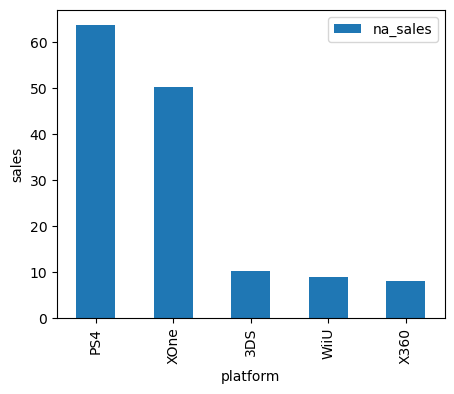

          eu_sales
platform          
PS4          83.54
XOne         28.10
PC            9.10
3DS           7.39
PS3           7.30
Суммарные продажи игр на Топ-5 платформах составляют: 135.43


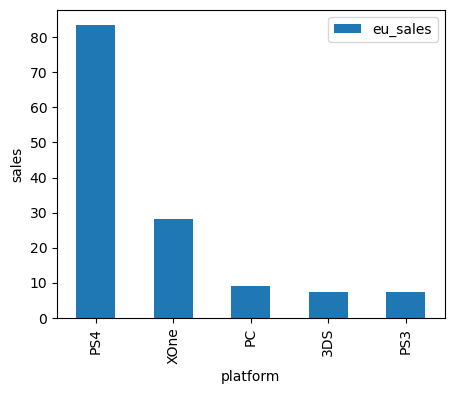

          jp_sales
platform          
3DS          23.55
PS4          12.05
PSV           8.41
PS3           4.97
WiiU          4.12
Суммарные продажи игр на Топ-5 платформах составляют: 53.1


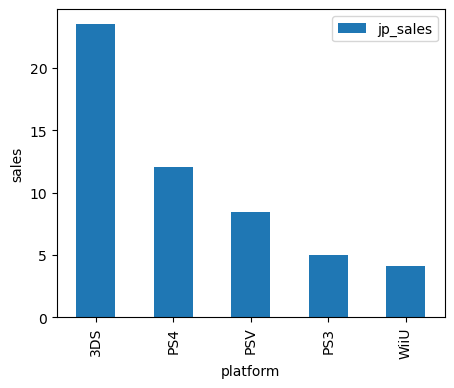

In [28]:
# Создадим цикл для отображения объемов продаж на различных платформах в регионах
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    table_column = data_act.pivot_table(index = 'platform', values = column, aggfunc = 'sum')\
    .sort_values(by = column, ascending = False)\
    .head()
    print(table_column)
    print('Суммарные продажи игр на Топ-5 платформах составляют:', table_column[column].sum())
    
    table_column.plot(kind = 'bar', figsize = (5, 4))
    plt.ylabel('sales')
    plt.show()

<div style="border:solid Green 2px; padding: 20px">

Из рассмотренных регионов больше всего играют в Северной Америке, а в Японии в 2.5 раза меньше геймеров. В Северной Америке и Европе самая популярная платформа это PS4, а вот XBOX ONE отстает от своего конкурента - причем в Европе отставание составляет более чем в 2 раза. В Японии платформа 3DS является абсолютным лидером, забирая почти половину продаж от рассматриваемого списка Топ 5 платформ. На втором же месте платформа PS4.

              na_sales
genre                 
Shooter          48.18
Action           33.68
Sports           26.31
Role-Playing     19.82
Misc              5.58
Суммарные продажи игр Топ-5 жанров составляют: 133.57000000000002


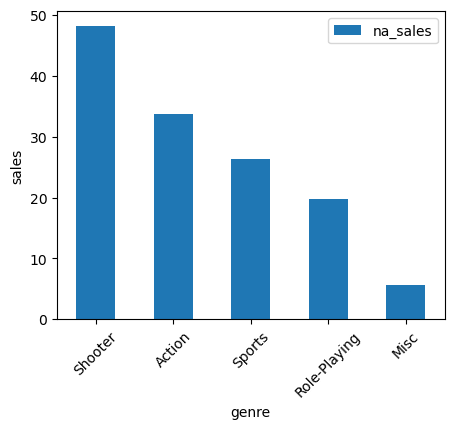

              eu_sales
genre                 
Shooter          40.28
Action           34.82
Sports           27.82
Role-Playing     17.21
Racing            6.52
Суммарные продажи игр Топ-5 жанров составляют: 126.64999999999999


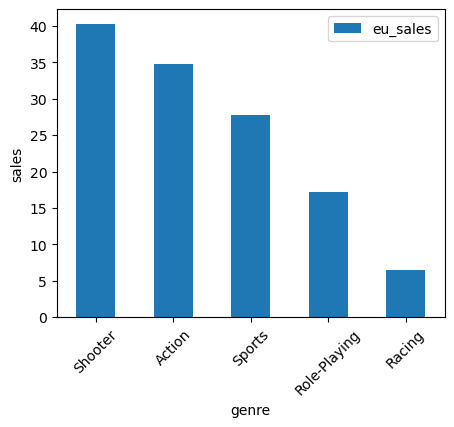

              jp_sales
genre                 
Action           23.05
Role-Playing     13.41
Shooter           3.79
Misc              3.19
Adventure         2.22
Суммарные продажи игр Топ-5 жанров составляют: 45.66


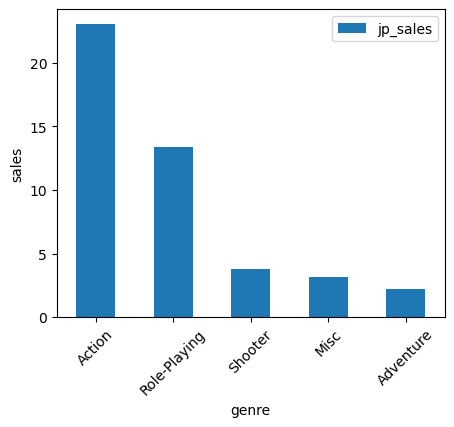

In [29]:
# Отобразим объемы продаж различных жанров в регионах
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    table_column = data_act.pivot_table(index = 'genre', values = column, aggfunc = 'sum')\
    .sort_values(by = column, ascending = False)\
    .head()
    print(table_column)
    print('Суммарные продажи игр Топ-5 жанров составляют:', table_column[column].sum())
    
    table_column.plot(kind = 'bar', figsize = (5, 4))
    plt.ylabel('sales')
    plt.xticks(rotation=45)
    plt.show()

<div style="border:solid Green 2px; padding: 20px">

Вновь Северная Америка и Европа похожи - близкий порядок общей суммы продаж и ранее определенные популярные жанры - лидер по продажам "шутер", а также "экшн" и "спорт". Единственное различие это 5 строчка - в Северной Америке больше предпочитают инди игры, а в Европе гонки.
    
В Японии отличия существенные: в 3 раза меньше проданных копий в сравнении с предыдущими регионами, а также другие любимые жанры. На первых местах находится экшн и RPG, а вот "шутер" занимет лишь 3 строчку с существенным отставанием.

        na_sales
rating          
M          47.03
E          26.59
T          22.86
E10+       17.87
Суммарные продажи игр Топ рейтинга составляют: 114.35000000000001


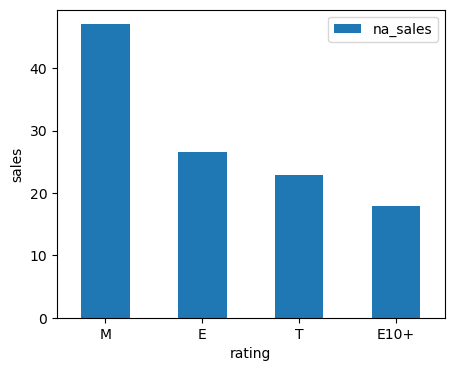

        eu_sales
rating          
M          45.54
E          34.83
T          20.32
E10+       11.54
Суммарные продажи игр Топ рейтинга составляют: 112.23


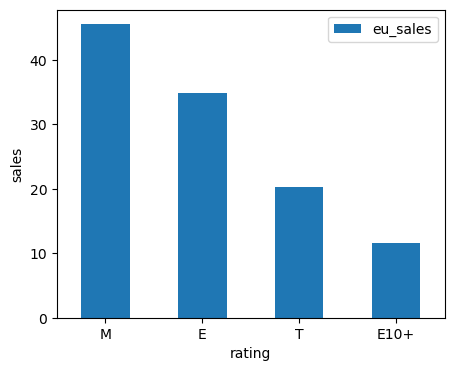

        jp_sales
rating          
T           7.70
E           5.25
M           4.29
E10+        3.27
Суммарные продажи игр Топ рейтинга составляют: 20.509999999999998


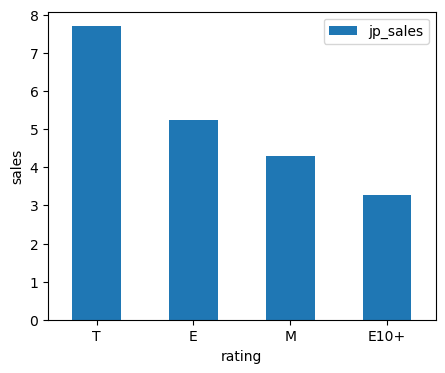

In [30]:
# Отобразим объемы продаж различного рейтинга ESRB в регионах
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    table_column = data_act.pivot_table(index = 'rating', values = column, aggfunc = 'sum')\
    .sort_values(by = column, ascending = False)\
    .head()
    print(table_column)
    print('Суммарные продажи игр Топ рейтинга составляют:', table_column[column].sum())
    
    table_column.plot(kind = 'bar', figsize = (5, 4))
    plt.ylabel('sales')
    plt.xticks(rotation=0)
    plt.show()

<div style="border:solid Green 2px; padding: 20px">

Для дальнейших выводов расшифруем рейтинг:
    
    M - («Mature») — «Для взрослых»
    E - («Everyone») — «Для всех»
    E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
    T - («Teen») — «Подросткам»
    
По аналогии с жанрами Северная Америка и Европа очень схожи - близкое количество продаж и одинаковый топ рейтинга: в основном предпочитают игры со взрослым рейтингом.
    
А в Японии, как известно, более строгие ограничения - в данном случае на первом месте идут игры для подростков.

<div style="border:solid Green 2px; padding: 20px">

**Вывод:**
    
Рассмотрев весь совокупный анализ можно предположить гипотезу о влиянии рейтингового ограничения в Японии на суммарное количество продаж игр: наибольшее количество игр имеют рейтинг "для взрослых", в то время как больший процент пользователей имеют возраст менее 18 лет, являясь подростками. Учитывая строгие ограничения в Японии это сказывается на общих продажах в регионе - их значительно меньше, чем в Северной Америке и Европе.
    
Таким образом портрет пользователя из Японии очень сильно отличается от портрета Европы и Северной Америки: в основном это подростки до 18 лет, которые предпочитают жанры "экшн" и RPG и платформу 3DS, в то время как в Европе и Северной Америке пользователи предпочитают игры со взрослым рейтингом (про возраст судить сложно, так как в данных регионах нет строгих ограничений), жанра "шутер" и "экшн" и платформы PS4 и XBOX ONE.

### Проверка статистических гипотез

#### Проверка первой гипотезы

<div style="border:solid Green 2px; padding: 20px">

Нулевая гипотеза: Средний пользовательский рейтинг платформы Xbox One равен рейтингу PC
    
Альтернативная гипотеза: Средний пользовательский рейтинг платформы Xbox One не равен рейтингу PC

In [31]:
# Удалим строки с пропусками для корректной работы функции
data_act = data_act.dropna(subset = ['critic_score', 'user_score', 'rating'])

In [32]:
# Проверка гипотезы с пороговым значеинем alpha = 0.05%
alpha = 0.05
suppose_one = st.ttest_ind(data_act.loc[data_act['platform'] == 'XOne', 'user_score'], 
                           data_act.loc[data_act['platform'] == 'PC', 'user_score'])

print('Значение p-value равно:', suppose_one.pvalue)

if suppose_one.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Значение p-value равно: 0.2992275957685526
Не отвергаем нулевую гипотезу


<div style="border:solid Green 2px; padding: 20px">

**Вывод:**    
    
Значение p-value равно 0.3, что позволяет сделать вывод о довольно близких выборках и не отвергнуть гипотезу о равенстве среднего пользовательского рейтинга платформы Xbox One и PC

#### Проверка второй гипотезы

<div style="border:solid Green 2px; padding: 20px">

Нулевая гипотеза: Средний пользовательский рейтинг жанра Action равен рейтингу жанра Sports 
    
Альтернативная гипотеза: Средний пользовательский рейтинг жанра Action не равен рейтингу жанра Sports

In [33]:
# Проверка гипотезы с пороговым значеинем alpha = 0.05%
alpha = 0.05
suppose_one = st.ttest_ind(data_act.loc[data_act['genre'] == 'Action', 'user_score'], 
                           data_act.loc[data_act['genre'] == 'Sports', 'user_score'])

print('Значение p-value равно:', suppose_one.pvalue)

if suppose_one.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Значение p-value равно: 1.48002830588572e-06
Отвергаем нулевую гипотезу


<div style="border:solid Green 2px; padding: 20px">

**Вывод:**    
    
Значение p-value равно 1.5 * 10^-6, что позволяет сделать вывод о разных выборках, отвергнуть нулевую гипотезу и принять альтернативную: средний пользовательский рейтинг жанра Action не равен рейтингу жанра Sports

### Общий вывод

<div style="border:solid Green 2px; padding: 20px">

**Вывод:** На основании проведенного анализа можно сделать следующие заключения:   
    
1. Игровая индустрия постоянно меняется - наибольшее количество игр выпускали в 2008-2009 годах, тогда релиз игр достигал порядка 1400 штук в год. Сейчас же наблюдается выход на "плато": с 2012 релиз составляет около 550 игр в год.
    
2. В среднем "срок жизни" платформы составляет порядка 10 лет, а новые модели из одной серии появляются примерно через 6 лет. На сегодняшний день определяется тенденция снижения интереса ко всем платформам - ни одна не показывает динамику роста по продажам.
    
3. Для прогнозирования грядущего года необходимо принять статистические данные за период с 2015 по 2016 год - такой прогноз будет наиболее достверным с учетом текущей динамики релиза игр, предпочтений по платформам и жанрам.
    
4. Наибольший интерес для пользователей представляют следующие платформы - PS4, XBOX ONE, 3DS.
    
5. Пользователи учитывают высокие оценки критиков - чем выше оценка, тем больше шансов на высокие продажи, а вот оценки других пользователей не пользуются таким авторитетом.
    
6. Наиболее популярные жанры игр это шутер, экшн, спорт и RPG.
    
7. Интересы в Северной Америке очень схожи с интересами Европы - игры с высоким рейтингом для популярных платформ в жанрах шутер, экшн или спорт. А вот для пользователей из Японии необходимы другие игры - платформа 3DS, низкий возрастной рейтинг для подростков и детей и жанры экшн и RPG.
    
8. Если игра имеет хорошие оценки на PC, то с большой долей вероятности и на XBOX'е оценки будут хорошими. А вот для жанров экшен и спорт такой зависимости нет - это свершенно разные совокупности и они не имеют ничего общего.
    
**Итоговая рекомендация:** 
    
Для того чтобы повысить шансы на успешный грядущий год для магазина "Стримчик", стоит подойти дифференцированно к рекламным кампаниям и учесть все вышеуказанные аспекты для геймеров разных регионов: 
    
**Северная Америка и Европа:** охватить наиболее популярные современные платформы PS4 и XBOX ONE, выделить больше рекламмы лидирующим жанрам шутер, экшн и спорт с возрастным рейтингом "М", "T" и "Е", а также не забывать про оценки критиков - больше рекламмы для игр с высокими оценками с учетом явного выделения рекордного балла от критиков. А главное не пропускать качественные шутеры со взрослым рейтингом: в Северной Америке и Европе такую игру моментально разберут геймеры с современными платформами PS4 и XBOX ONE!
    
**Япония:** Учитывая строгие ограничения в регионе, рекламмные кампании магазины должны быть реализованы с учетом данных особенностей. Игры в жанрах "экшен" и "RPG" в низком рейтинге - "T" и "Е" для плтаформ 3DS и PS4.